In [2]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Thushar Mohan\OneDrive\Desktop\Machine Learning\Data Set\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder 

LE = LabelEncoder()

In [5]:
df['Gender']= LE.fit_transform(df['Gender'])

In [6]:
df['Gender'].dtypes

dtype('int32')

In [11]:
X = df.iloc[:, 1:4].values

In [12]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [17]:
y = df.iloc[:,-1].values

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [21]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

X = sc.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
#Training the decision Tree Classification model on training set 

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier( criterion ='entropy', random_state= 0, max_leaf_nodes=6)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=0)

In [26]:
#Predicting the test set result  

y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix (y_test, y_pred)

print(cm)

[[64  4]
 [ 2 30]]


In [30]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [31]:
from sklearn import tree

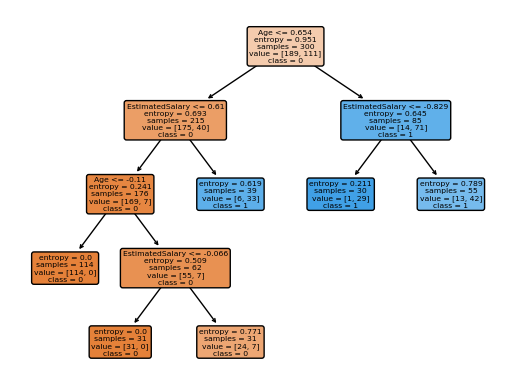

In [32]:
dec_tree = tree.plot_tree(decision_tree = classifier, feature_names = ['Gender','Age','EstimatedSalary'], class_names=['0','1'], filled= True, rounded= True)